In [165]:
from dolfin import *
import time
set_log_level(30)

In [166]:
PETSc.Options().setValue("ksp_view", True)
PETSc.Options().getAll()

{'ksp_view': 'true'}

In [167]:
N = 2**7
print(N)
mesh = UnitSquareMesh(N, N)

128


In [168]:
V = FunctionSpace(mesh, "Lagrange", 1)

In [169]:
# Define Dirichlet boundary (x = 0 or x = 1)
def boundary(x):
    return x[0] < DOLFIN_EPS or x[0] > 1.0 - DOLFIN_EPS

In [170]:
# Define boundary condition
u0 = Constant(0.0)
bc = DirichletBC(V, u0, boundary)


In [171]:
# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Expression("10*exp(-(pow(x[0] - 0.5, 2) + pow(x[1] - 0.5, 2)) / 0.02)", degree=2)
g = Expression("sin(5*x[0])", degree=2)
a = inner(grad(u), grad(v))*dx
L = f*v*dx + g*v*ds

u = Function(V)
v = Function(V)
w = Function(V)

In [181]:
# Compute solution
t = time.time()
solve(a == L, u, bc, solver_parameters={'linear_solver': 'gmres', 
                                        'preconditioner': 'ilu'})
t_elapsed = time.time()-t
print("compute time:", t_elapsed)

compute time: 0.20658469200134277


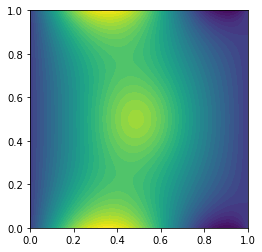

In [173]:
# Save solution in VTK format
file = File("poisson.pvd")
file << u

# Plot solution
import matplotlib.pyplot as plt
plot(u)
plt.show()

In [180]:
t = time.time()
problem = LinearVariationalProblem(a, L, v, bc)
solver = LinearVariationalSolver(problem)
solver.solve()
t_elapsed = time.time()-t
print("compute time:", t_elapsed)

compute time: 0.19394850730895996


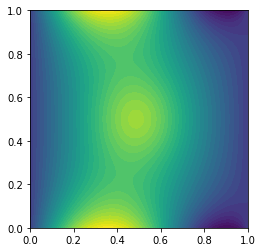

In [182]:
# Plot solution
import matplotlib.pyplot as plt
plot(v)
plt.show()

In [189]:
PETScOptions.set("ksp_view")
t = time.time()
A, b = assemble_system(a, L, bc)
solver = PETScKrylovSolver()
solver.set_from_options() 
solver.solve(A, w.vector(), b)
t_elapsed = time.time()-t
print("compute time:", t_elapsed)

compute time: 0.22467589378356934


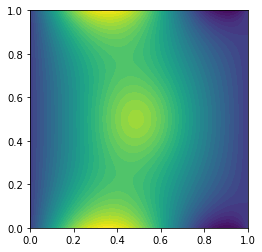

In [190]:
# Plot solution
import matplotlib.pyplot as plt
plot(w)
plt.show()